# Your first convolutional neural network

# imports

In [16]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization, LeakyReLU,ReLU, Dropout, Activation , concatenate , Add
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

from keras.datasets import cifar10

# data

In [17]:
NUM_CLASSES = 10


In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [20]:
x_train[54, 12, 13, 1]

0.36862746

In [21]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 batch_normalization_17 (Ba  (None, 32, 32, 8)         32        
 tchNormalization)                                               
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 32, 32, 8)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 8)         584       
                                                                 
 batch_normalization_18 (Ba  (None, 32, 32, 8)         32        
 tchNormalization)                                         

# train

In [23]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
history = model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 34s 16ms/step - loss: 1.8092 - accuracy: 0.3583 - val_loss: 1.5025 - val_accuracy: 0.4615
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3877 - accuracy: 0.5076 - val_loss: 1.2126 - val_accuracy: 0.5623
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2063 - accuracy: 0.5796 - val_loss: 1.1242 - val_accuracy: 0.6004
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0859 - accuracy: 0.6214 - val_loss: 1.0534 - val_accuracy: 0.6272
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0056 - accuracy: 0.6510 - val_loss: 1.0349 - val_accuracy: 0.6421
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9429 - accuracy: 0.6752 - val_loss: 0.9498 - val_accuracy: 0.6666
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8920 - accuracy: 0.6944 - val_loss: 0.9181 -

In [25]:
model.layers[6].get_weights()

[]

# analysis

In [26]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 24ms/step - loss: 0.8611 - accuracy: 0.6985


[0.8611396551132202, 0.6984999775886536]

In [27]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 4ms/step


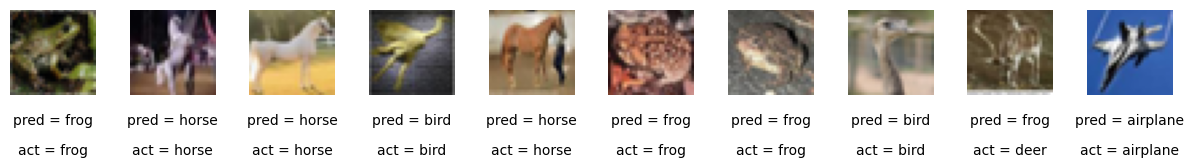

In [28]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


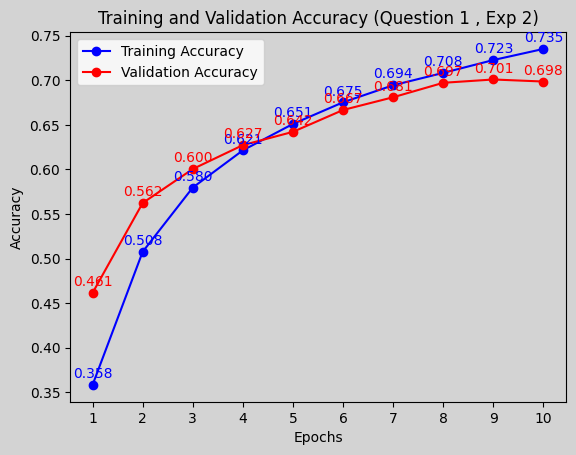

In [33]:

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy',color='blue',marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy',color='red',marker='o')

for i, txt in enumerate(train_accuracy):
    plt.annotate(f'{txt:.3f}', (epochs[i], train_accuracy[i]), textcoords="offset points", xytext=(0, 5), ha='center', color='blue')

for i, txt in enumerate(val_accuracy):
    plt.annotate(f'{txt:.3f}', (epochs[i], val_accuracy[i]), textcoords="offset points", xytext=(0, 5), ha='center', color='red')

plt.title('Training and Validation Accuracy (Question 1 , Exp 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()
plt.show()

In [30]:
import csv

csv_file_path = 'Q1.csv'

with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)

header = rows[0]
new_column = ['Ex2_trainacc','Ex2_valacc']

for column in new_column:
    if column not in header:
        header.append(column)

rows[0] = header

for row, t_acc, v_acc in zip(rows[1:], train_accuracy,val_accuracy ):
    row.extend([t_acc, v_acc])

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

print(f"Accuracy values have been appended to new rows in {csv_file_path}")

Accuracy values have been appended to new rows in Q1.csv
